In [3]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

In [11]:
dataset_url = "C:/Users/user/Downloads/charts/" #dataset location 
data_dir = pathlib.Path(dataset_url)                                #Load dataset

In [12]:
image_count = len(list(data_dir.glob('*/*.jpeg')))                  #dataset length
print(image_count)

0


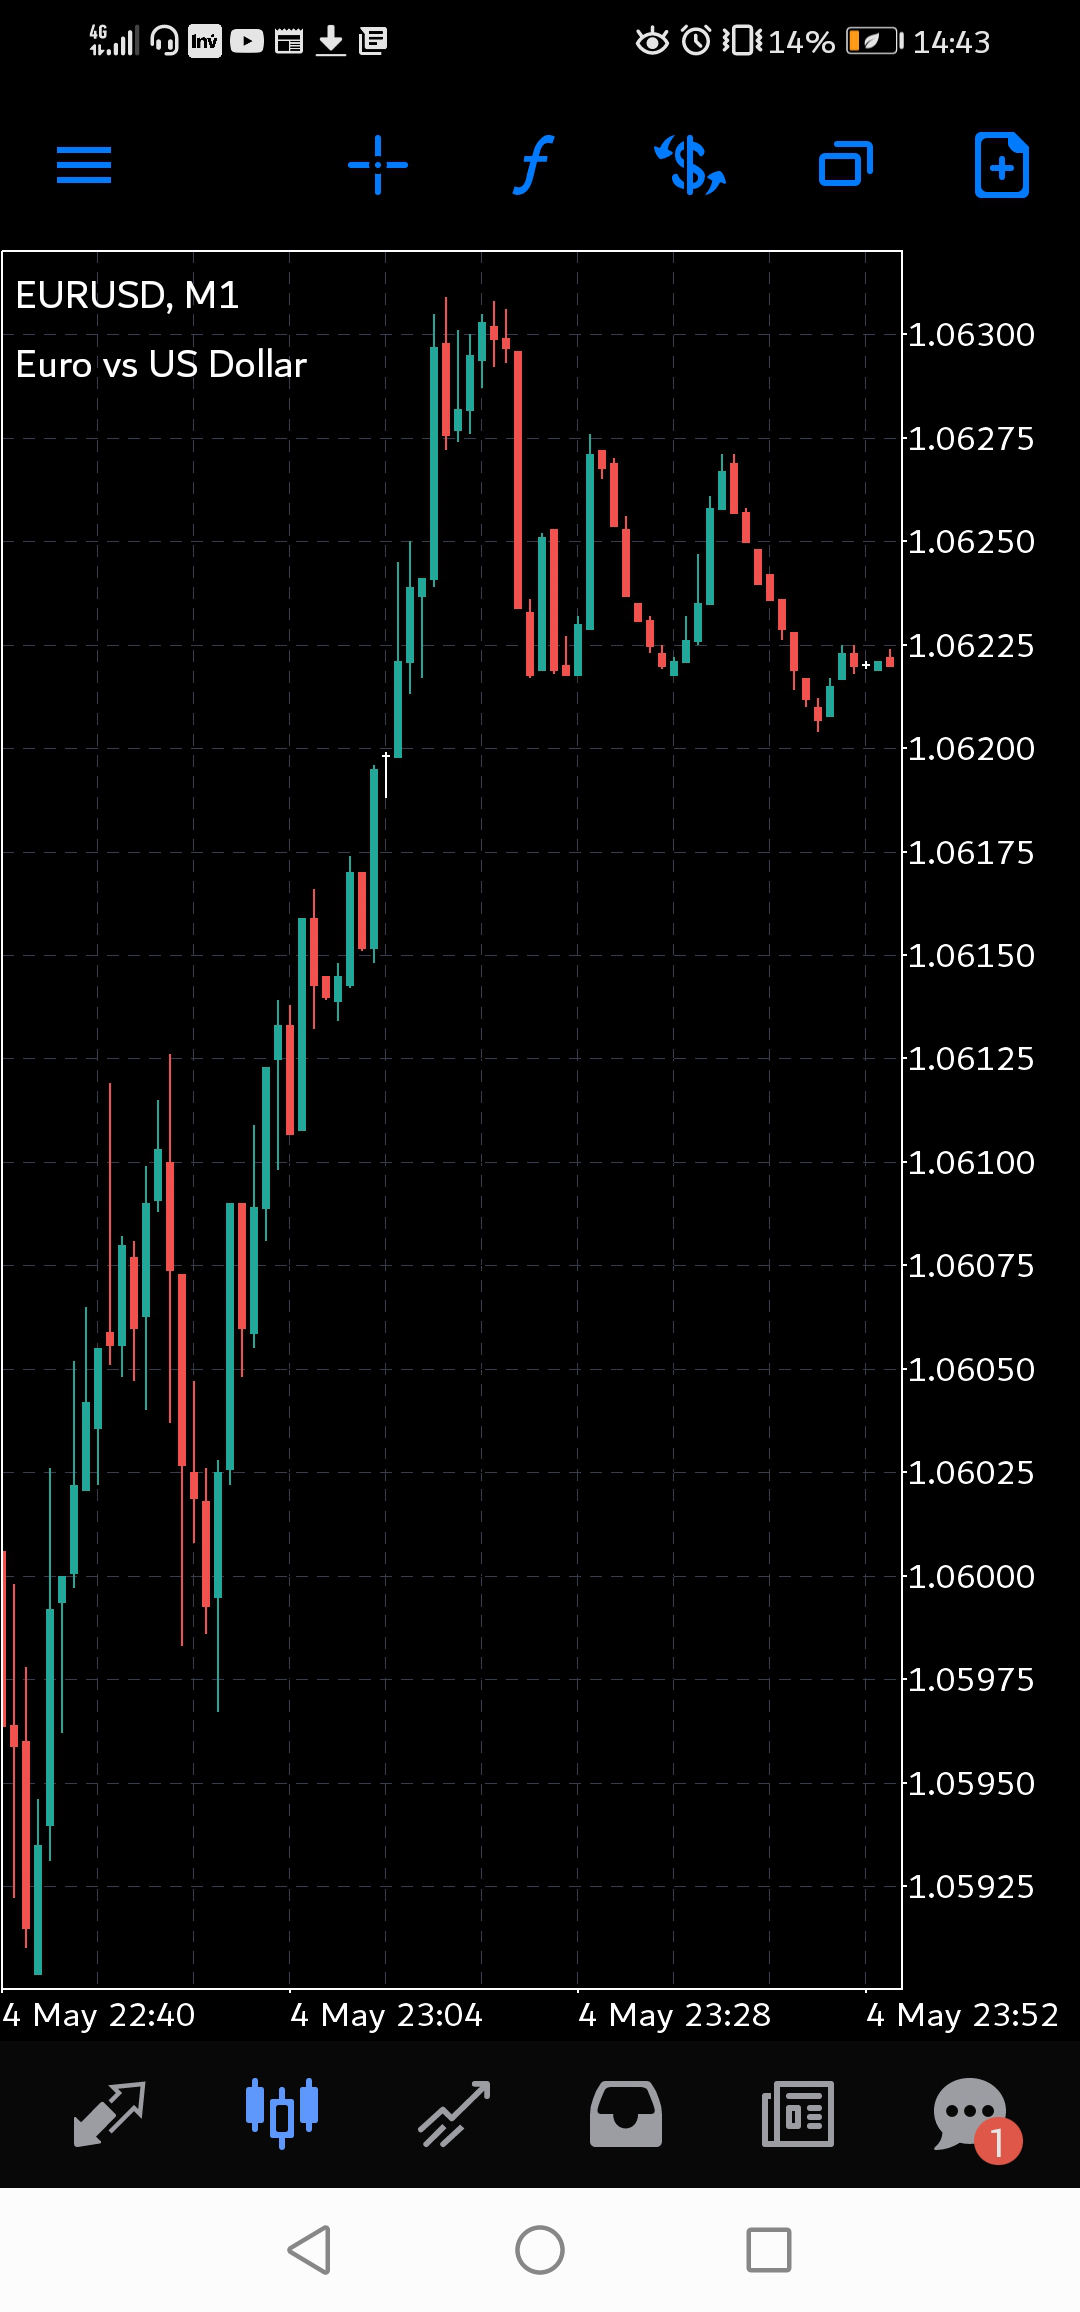

In [13]:
pneumonia = list(data_dir.glob('buy-power/*'))                     #printing image in dataset pneumonia
PIL.Image.open(str(pneumonia[0]))

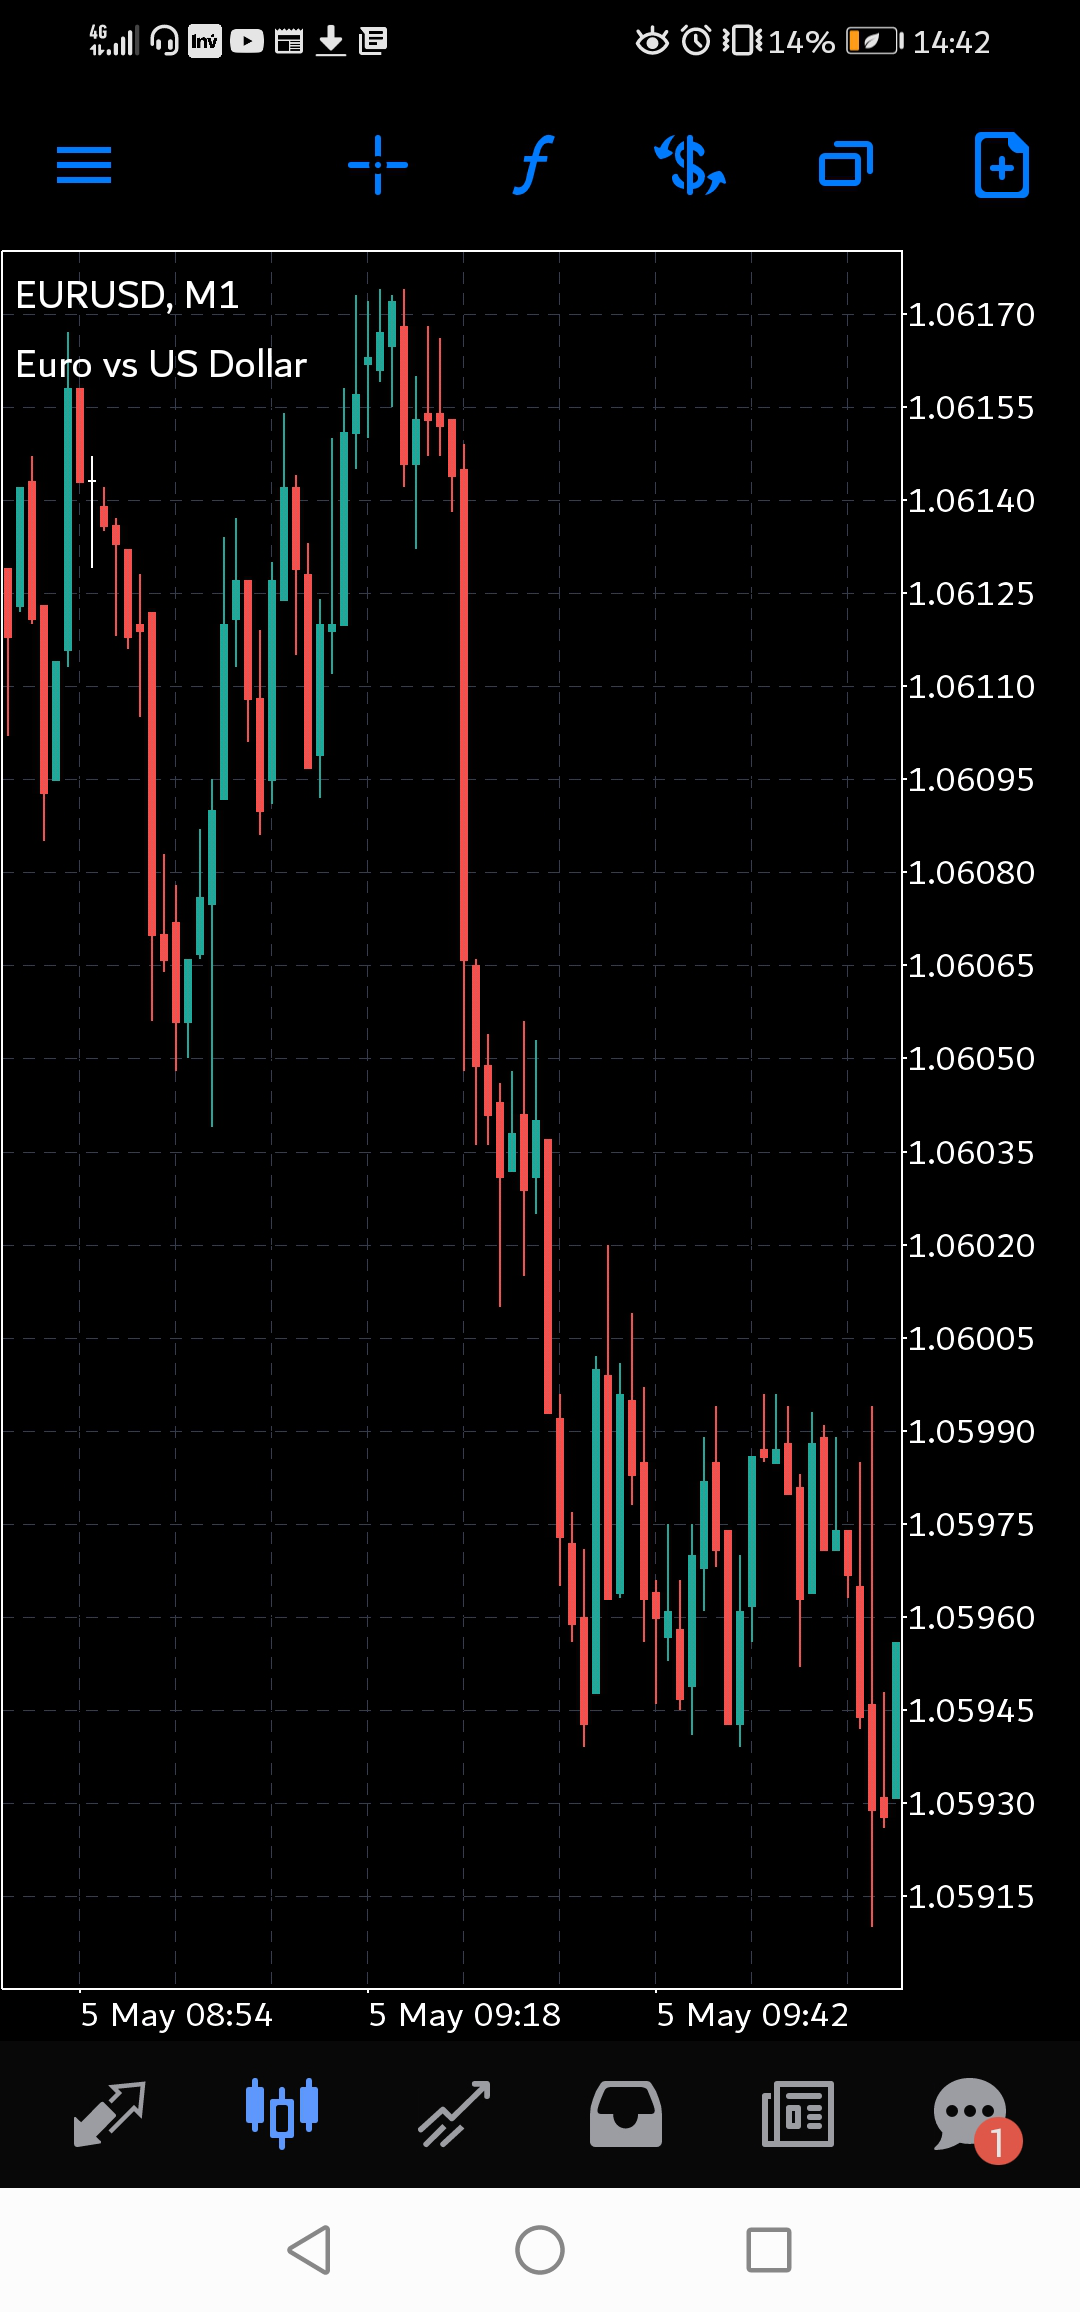

In [16]:
normal = list(data_dir.glob('sell-power/*'))                    #printing image in dataset normal
PIL.Image.open(str(normal[1])) 

In [18]:
##dataset prerocessing step 1
batch_size = 32
img_height = 180
img_width = 180

In [19]:
#dataset prerocessing step 2
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed = 123,
    image_size =(img_height, img_width),
    batch_size=batch_size)

Found 191 files belonging to 3 classes.
Using 153 files for training.


In [20]:
#dataset prerocessing step 3
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="validation",
    seed = 123,
    image_size =(img_height, img_width),
    batch_size=batch_size)

Found 191 files belonging to 3 classes.
Using 38 files for validation.


In [21]:
class_names = train_ds.class_names         #Identify Classes
print(class_names)

['BUY-POWER', 'NEUTRAL', 'SELL-POWER']


In [20]:
#Visualizing the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8")
    plt.title(class_names[labels[i]])
    plt.axis("off")

SyntaxError: invalid syntax (<ipython-input-20-3e4f9fd8f053>, line 9)

In [22]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [23]:
#Standardize the data

from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [24]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [25]:
num_classes = 3

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [26]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [28]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
5/5 [==============================] - 51s 10s/step - loss: 1.1483 - accuracy: 0.5033 - val_loss: 0.9296 - val_accuracy: 0.7105
Epoch 2/30
5/5 [==============================] - 50s 10s/step - loss: 0.7383 - accuracy: 0.8235 - val_loss: 0.8715 - val_accuracy: 0.5526
Epoch 3/30
5/5 [==============================] - 49s 10s/step - loss: 0.4956 - accuracy: 0.7843 - val_loss: 0.4953 - val_accuracy: 0.7895
Epoch 4/30
5/5 [==============================] - 48s 10s/step - loss: 0.3691 - accuracy: 0.8497 - val_loss: 0.4518 - val_accuracy: 0.7895
Epoch 5/30
5/5 [==============================] - 48s 10s/step - loss: 0.3349 - accuracy: 0.8954 - val_loss: 0.5317 - val_accuracy: 0.7632
Epoch 6/30
5/5 [==============================] - 49s 10s/step - loss: 0.2185 - accuracy: 0.9150 - val_loss: 0.3856 - val_accuracy: 0.7895
Epoch 7/30
5/5 [==============================] - 48s 10s/step - loss: 0.1501 - accuracy: 0.9412 - val_loss: 0.5222 - val_accuracy: 0.7632
Epoch 8/30
5/5 [===========

In [29]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=1
)

5/5 [==============================] - 50s 10s/step - loss: 1.4880e-04 - accuracy: 1.0000 - val_loss: 0.8110 - val_accuracy: 0.8421


In [20]:
model.save("stockmodeltf")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: stockmodeltf\assets


In [31]:
s_url = "C:/Users/user/Downloads/chest_xray/chest_xray/test/pneumonia/person1_virus_7.jpeg"
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.preprocessing.image.load_img(
    s_url, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/user/Downloads/chest_xray/chest_xray/test/pneumonia/person1_virus_7.jpeg'

In [4]:
# Converting a SavedModel to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_saved_model('C:/Users/user/stockmodeltf')
tflite_model = converter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

OSError: SavedModel file does not exist at: C:/Users/user/stock_model.h5/{saved_model.pbtxt|saved_model.pb}

In [30]:
model.export(export_dir="C:/Users/user/", with_metadata = True)

AttributeError: 'Sequential' object has no attribute 'export'

In [32]:
tf

<module 'tensorflow' from 'C:\\Users\\user\\.conda\\envs\\Tensorflow\\lib\\site-packages\\tensorflow\\__init__.py'>

In [33]:
help()


Welcome to Python 3.7's help utility!

If this is your first time using Python, you should definitely check out
the tutorial on the Internet at https://docs.python.org/3.7/tutorial/.

Enter the name of any module, keyword, or topic to get help on writing
Python programs and using Python modules.  To quit this help utility and
return to the interpreter, just type "quit".

To get a list of available modules, keywords, symbols, or topics, type
"modules", "keywords", "symbols", or "topics".  Each module also comes
with a one-line summary of what it does; to list the modules whose name
or summary contain a given string such as "spam", type "modules spam".

help> tf
No Python documentation found for 'tf'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.


You are now leaving help and returning to the Python interpreter.
If you want to ask for help on a particular object directly from the
interpreter, you can type "help(object)".  Executing "help('stri

In [39]:
tf

<module 'tensorflow' from 'C:\\Users\\user\\.conda\\envs\\Tensorflow\\lib\\site-packages\\tensorflow\\__init__.py'>

In [40]:
tf.lite.model_maker.core

AttributeError: module 'tensorflow._api.v2.lite' has no attribute 'model_maker'